<a href="https://colab.research.google.com/github/sambhajizambre/Assignments/blob/main/Copy_LOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from numpy import percentile
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

# Preparing the dataset


In [2]:
df= pd.read_csv("/content/drive/MyDrive/python/superstore.csv")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.shape

(9994, 21)

# Sales Variable Analysis

In [6]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales distribution')

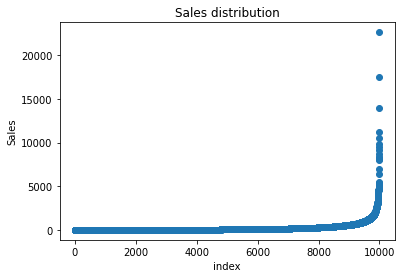

In [8]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Sales')

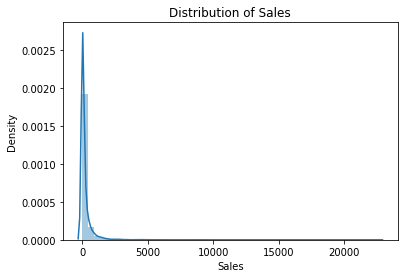

In [10]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")


In [11]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


The Superstore’s sales distribution is far from a normal distribution, and it has a positive long thin tail, the mass of the distribution is concentrated on the left of the figure. And the tail sales distribution far exceeds the tails of the normal distribution. There are one region where the data has low probability to appear which is on the right side of the distribution.

# Profit Variable Analysis

In [12]:
df.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

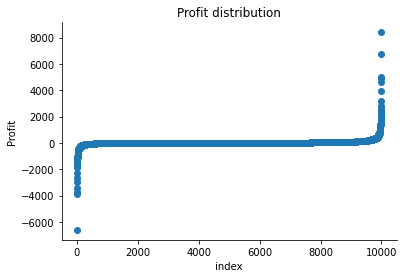

In [13]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


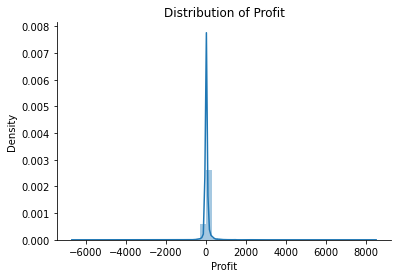

In [14]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

In [15]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


The Superstore’s Profit distribution has both a positive tail and negative tail. However, the positive tail is longer than the negative tail. So the distribution is positive skewed, and the data are heavy-tailed or profusion of outliers. There are two regions where the data has low probability to appear: one on the right side of the distribution, another one on the left.

In [16]:
Lof = LocalOutlierFactor(n_neighbors=20,novelty=True, contamination=0.01)
Lof.fit(df['Sales'].values.reshape(-1, 1))
df['anomaly_score_sales'] = Lof.decision_function(df['Sales'].values.reshape(-1, 1))
df['outlier_sales'] = Lof.predict(df['Sales'].values.reshape(-1, 1))

In [17]:
df.sort_values('anomaly_score_sales')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_sales,outlier_sales
3233,3234,US-2017-156356,4/16/2017,4/22/2017,Standard Class,ND-18370,Natalie DeCherney,Consumer,United States,Houston,...,OFF-ST-10002301,Office Supplies,Storage,Tennsco Commercial Shelving,32.544,2,0.2,-7.7292,-4.212000e+08,-1
7366,7367,CA-2016-127243,11/28/2016,12/4/2016,Standard Class,DS-13180,David Smith,Corporate,United States,Philadelphia,...,OFF-ST-10002301,Office Supplies,Storage,Tennsco Commercial Shelving,32.544,2,0.2,-7.7292,-4.212000e+08,-1
3737,3738,CA-2016-115476,3/17/2016,3/17/2016,Same Day,VM-21835,Vivian Mathis,Consumer,United States,Newark,...,OFF-BI-10000962,Office Supplies,Binders,Acco Flexible ACCOHIDE Square Ring Data Binder...,32.540,2,0.0,15.9446,-4.132000e+08,-1
8546,8547,CA-2016-119074,3/27/2016,3/31/2016,Standard Class,DS-13180,David Smith,Corporate,United States,Columbus,...,OFF-BI-10000962,Office Supplies,Binders,Acco Flexible ACCOHIDE Square Ring Data Binder...,32.540,2,0.0,15.9446,-4.132000e+08,-1
8151,8152,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,OFF-ST-10001558,Office Supplies,Storage,Acco Perma 4000 Stacking Storage Drawers,32.480,2,0.0,4.8720,-3.796000e+08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,2702,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,OFF-FA-10003112,Office Supplies,Fasteners,Staples,18.936,3,0.2,5.9175,1.556000e+08,1
7848,7849,CA-2016-104311,5/2/2016,5/6/2016,Standard Class,AS-10090,Adam Shillingsburg,Consumer,United States,Irving,...,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,18.936,3,0.2,-3.7872,1.556000e+08,1
7576,7577,CA-2014-134726,11/2/2014,11/7/2014,Second Class,SW-20755,Steven Ward,Corporate,United States,Seattle,...,TEC-AC-10000023,Technology,Accessories,"Maxell 74 Minute CD-R Spindle, 50/Pack",41.940,2,0.0,15.0984,1.556000e+08,1
8129,8130,CA-2014-127866,7/20/2014,7/23/2014,First Class,JD-15895,Jonathan Doherty,Corporate,United States,Riverside,...,TEC-AC-10000023,Technology,Accessories,"Maxell 74 Minute CD-R Spindle, 50/Pack",41.940,2,0.0,15.0984,1.556000e+08,1


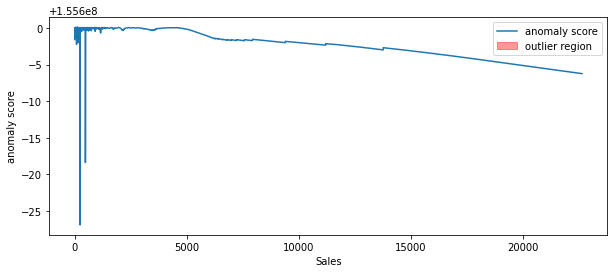

In [18]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = Lof.decision_function(xx)
outlier = Lof.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

In [19]:
Lof_profit = LocalOutlierFactor(n_neighbors=20,novelty=True, contamination=0.01)
Lof_profit.fit(df['Profit'].values.reshape(-1, 1))
df['anomaly_score_profit'] = Lof_profit.decision_function(df['Profit'].values.reshape(-1, 1))
df['outlier_profit'] = Lof_profit.predict(df['Profit'].values.reshape(-1, 1))

In [20]:
df.sort_values('anomaly_score_profit')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_sales,outlier_sales,anomaly_score_profit,outlier_profit
1566,1567,CA-2015-129112,11/29/2015,11/30/2015,First Class,AW-10840,Anthony Witt,Consumer,United States,Allen,...,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,21.480,3,0.2,-0.2685,1.556000e+08,1,-1.845327e+09,-1
1496,1497,CA-2017-152485,9/4/2017,9/8/2017,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,...,Storage,Acco Perma 3000 Stacking Storage Drawers,16.784,1,0.2,-0.2098,1.556000e+08,1,-1.537152e+09,-1
7413,7414,CA-2017-121125,5/30/2017,6/3/2017,Standard Class,MG-17890,Michael Granlund,Home Office,United States,Tigard,...,Furnishings,Tensor Brushed Steel Torchiere Floor Lamp,13.592,1,0.2,-0.3398,1.556000e+08,1,-8.433075e+08,-1
4660,4661,CA-2015-112130,5/3/2015,5/7/2015,Standard Class,SV-20785,Stewart Visinsky,Consumer,United States,Philadelphia,...,Accessories,SanDisk Cruzer 16 GB USB Flash Drive,27.552,3,0.2,-0.3444,1.556000e+08,1,-8.433075e+08,-1
3228,3229,CA-2014-108189,10/2/2014,10/5/2014,First Class,ES-14080,Erin Smith,Corporate,United States,Tempe,...,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,7.160,1,0.2,-0.0895,1.556000e+08,1,-7.883225e+08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,6918,CA-2014-124247,12/16/2014,12/21/2014,Standard Class,SH-20635,Stefanie Holloman,Corporate,United States,Sacramento,...,Chairs,Office Star - Professional Matrix Back Chair w...,1403.920,5,0.2,70.1960,1.556000e+08,1,6.192750e+07,1
9759,9760,CA-2016-146913,10/31/2016,11/5/2016,Standard Class,SF-20965,Sylvia Foulston,Corporate,United States,San Francisco,...,Chairs,Office Star - Professional Matrix Back Chair w...,1403.920,5,0.2,70.1960,1.556000e+08,1,6.192750e+07,1
9143,9144,US-2017-166688,5/20/2017,5/26/2017,Standard Class,RD-19480,Rick Duston,Consumer,United States,Las Vegas,...,Phones,Motorola L703CM,1123.128,9,0.2,70.1955,1.556000e+08,1,6.192750e+07,1
3840,3841,CA-2014-126760,7/26/2014,8/2/2014,Standard Class,KM-16720,Kunst Miller,Consumer,United States,North Las Vegas,...,Accessories,Logitech Illuminated Ultrathin Keyboard with B...,170.970,3,0.0,70.0977,1.556000e+08,1,6.192750e+07,1


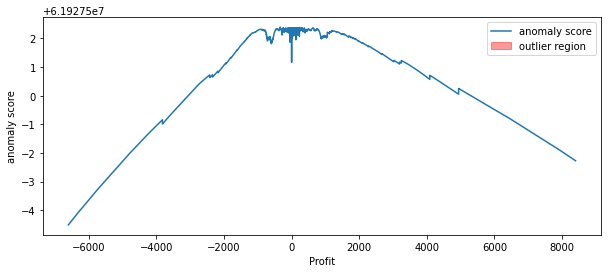

In [21]:
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = Lof_profit.decision_function(xx)
outlier = Lof_profit.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

In [22]:
df[(df['outlier_profit']==-1) & (df['outlier_sales']==-1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_sales,outlier_sales,anomaly_score_profit,outlier_profit
63,64,CA-2015-135545,11/24/2015,11/30/2015,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,...,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",25.824,6,0.2,9.3612,-2.872000e+08,-1,-5.038750e+07,-1


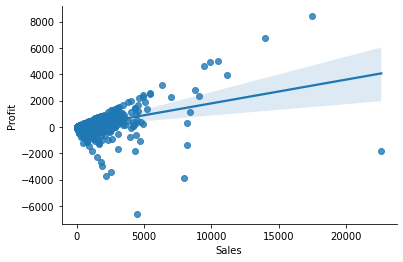

In [23]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

# From the above correlation chart, we can see that some of the data points are obvious outliers such as extreme low and extreme high values.

In [24]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(df[['Sales','Profit']])

In [25]:
clf = LocalOutlierFactor(n_neighbors=100,novelty=True, contamination=0.01)
clf.fit(X)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(X)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(X)

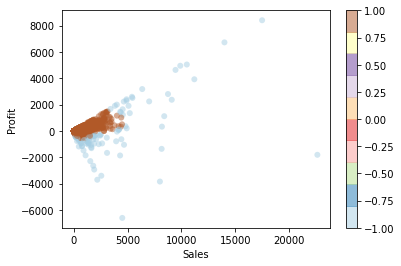

In [26]:
plt.scatter(df['Sales'], df['Profit'],
            c=df.multivariate_outlier, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar();

In [28]:
df[(df['outlier_sales'] == 1) & (df['outlier_profit'] == 1) & (df['multivariate_outlier'] == -1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,anomaly_score_sales,outlier_sales,anomaly_score_profit,outlier_profit,multivariate_anomaly_score,multivariate_outlier
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,3083.430,7,0.5,-1665.0522,1.556000e+08,1,6.192750e+07,1,-1.548642,-1
165,166,CA-2014-139892,9/8/2014,9/12/2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,8159.952,8,0.4,-1359.9920,1.556000e+08,1,6.192750e+07,1,-2.604282,-1
169,170,CA-2014-139892,9/8/2014,9/12/2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,177.980,5,0.8,-453.8490,1.556000e+08,1,6.192750e+07,1,-0.066652,-1
215,216,CA-2015-146262,1/2/2015,1/9/2015,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,1188.000,9,0.7,-950.4000,1.556000e+08,1,6.192750e+07,1,-0.438146,-1
262,263,US-2014-106992,9/19/2014,9/21/2014,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,...,3059.982,3,0.4,-509.9970,1.556000e+08,1,6.192750e+07,1,-0.377032,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9231,9232,CA-2014-148383,12/27/2014,12/31/2014,Standard Class,RP-19390,Resi Pölking,Consumer,United States,Phoenix,...,946.764,6,0.7,-694.2936,1.556000e+08,1,6.192750e+07,1,-0.082819,-1
9270,9271,US-2017-102183,8/21/2017,8/28/2017,Standard Class,PK-19075,Pete Kriz,Consumer,United States,New York City,...,4305.552,6,0.2,1453.1238,1.556000e+08,1,6.192750e+07,1,-0.117475,-1
9480,9481,CA-2014-126193,9/7/2014,9/14/2014,Standard Class,SS-20410,Shahid Shariari,Consumer,United States,Oswego,...,304.990,5,0.8,-533.7325,1.556000e+08,1,6.192750e+07,1,-0.127277,-1
9639,9640,CA-2015-116638,1/28/2015,1/31/2015,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,4297.644,13,0.4,-1862.3124,1.556000e+08,1,6.192750e+07,1,-1.753178,-1


In [29]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df[['Sales','Profit']].values
y_pred = clf.fit_predict(X)

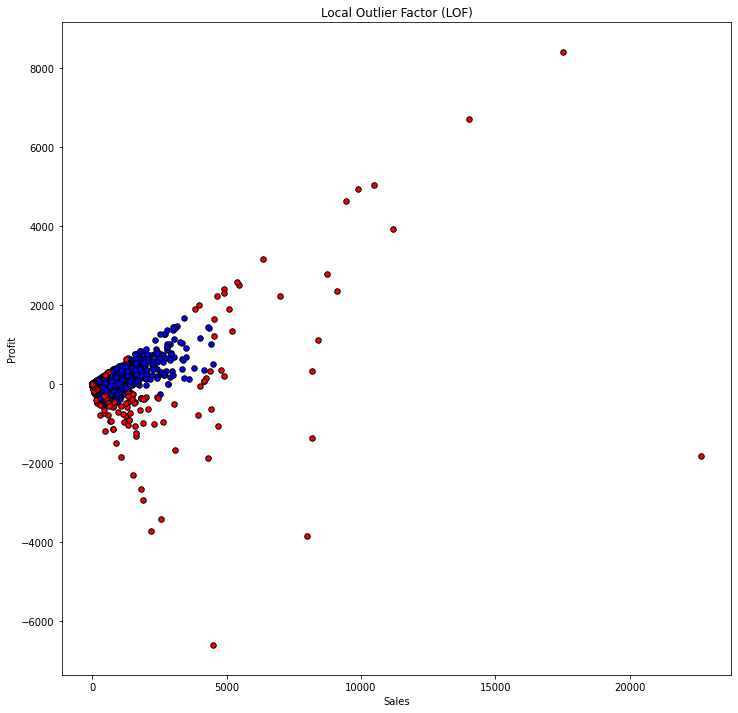

In [30]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Sales');
plt.ylabel('Profit');
plt.show()

### **Method 2 **

# Creating input and target variables

In [31]:
X=df.iloc[:,-4]
X

0       6.192750e+07
1       6.192750e+07
2       6.192750e+07
3       6.192750e+07
4       6.192750e+07
            ...     
9989    6.192750e+07
9990    6.192750e+07
9991    6.192750e+07
9992    6.192750e+07
9993    6.192750e+07
Name: anomaly_score_profit, Length: 9994, dtype: float64

In [32]:
y=df.iloc[:, -1]
y

0       1
1       1
2       1
3       1
4       1
       ..
9989    1
9990    1
9991    1
9992    1
9993    1
Name: multivariate_outlier, Length: 9994, dtype: int64

In [33]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf

LocalOutlierFactor(contamination=0.1)

Use fit_predict() to compute the predicted labels of the training samples. When LOF is used for outlier detection, the estimator has no predict(), decision_function() and score_samples() methods.

In [34]:
# use fit_predict to compute the predicted labels of the training samples
clf.fit(df['Sales'].values.reshape(-1, 1))
y_pred = clf.fit_predict(df['Sales'].values.reshape(-1, 1))
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

In [35]:
y_pred


array([ 1, -1,  1, ...,  1,  1,  1])

In [36]:
X_scores

array([-1.05885686, -1.3738282 , -0.98104422, ..., -0.96793834,
       -1.01527037, -1.00322824])

LOF score(x_scores) tells us if a data point has a substantially lower density than its neighbors, then the data point is considered as an outlier.

y_pred is 1 for an inlier and -1 for an outlier.

Visualize the outliers using matplotlib, where the LOF score is not 1.

In [37]:
df1 = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = clf.decision_function(df1)
outlier = clf.predict(df1)

plt.figure(figsize=(10,4))
plt.plot(df1, anomaly_score, label='anomaly score')
plt.fill_between(df1.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

AttributeError: ignored

In [39]:
lofs_index = np.where(y_pred!=1)
values = X[lof_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(clf[:,0], clf[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="upper left")
plt.show()

NameError: ignored

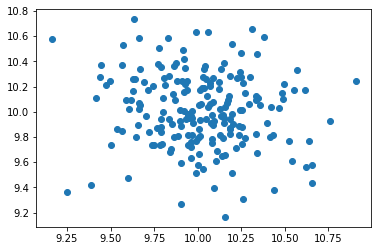

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)
print(lof) 

LocalOutlierFactor(contamination=0.03)


In [ ]:
y_pred = lof.fit_predict(x)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
lofs_index = where(y_pred==-1)
values = x[lofs_index]
values

array([[10.32193863, 10.09065371],
       [10.25019623,  9.77517601],
       [10.19415643,  9.92870018],
       [ 9.66304348, 10.41854088],
       [ 9.75714407,  9.5810329 ],
       [ 9.85528628, 10.13393112]])

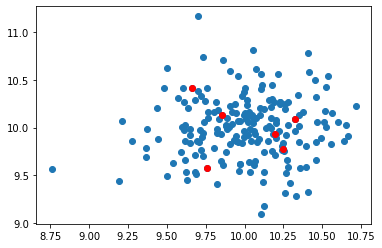

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

In [ ]:
model = LocalOutlierFactor(n_neighbors=20) 
model

LocalOutlierFactor()

In [ ]:
model.fit_predict(x)
lof = model.negative_outlier_factor_ 

In [ ]:
thresh = quantile(lof, .03)
print(thresh)

-1.5942619100478512


In [ ]:
index = where(lof<=thresh)
values = x[index]

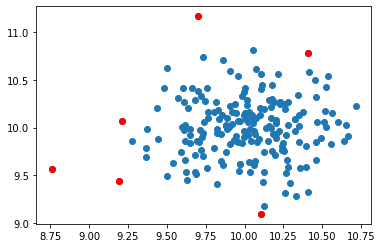

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()